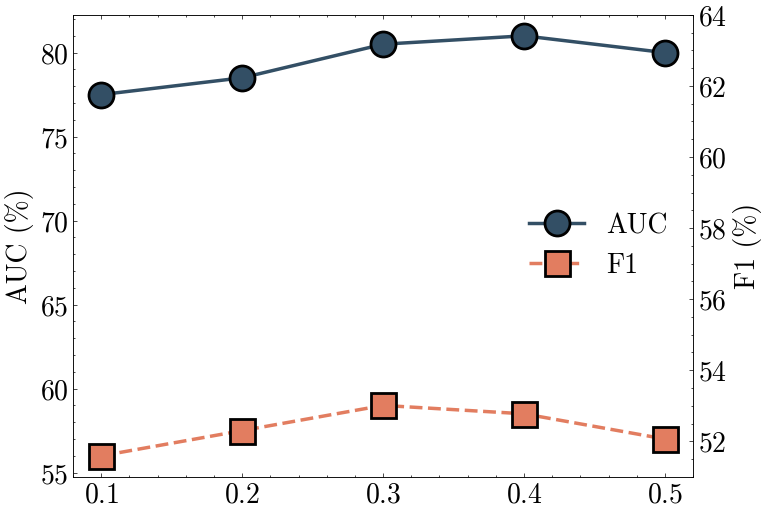

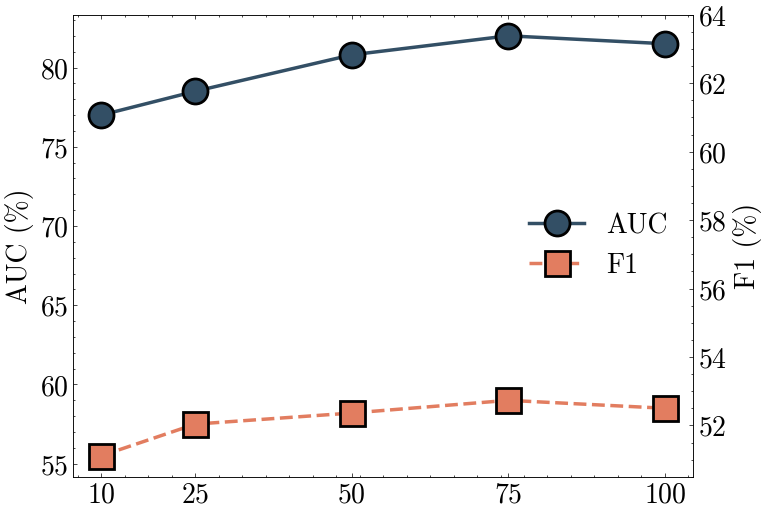

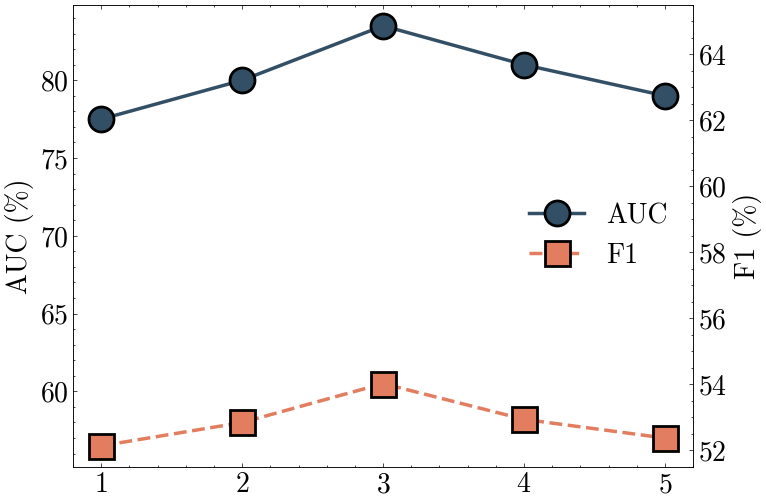

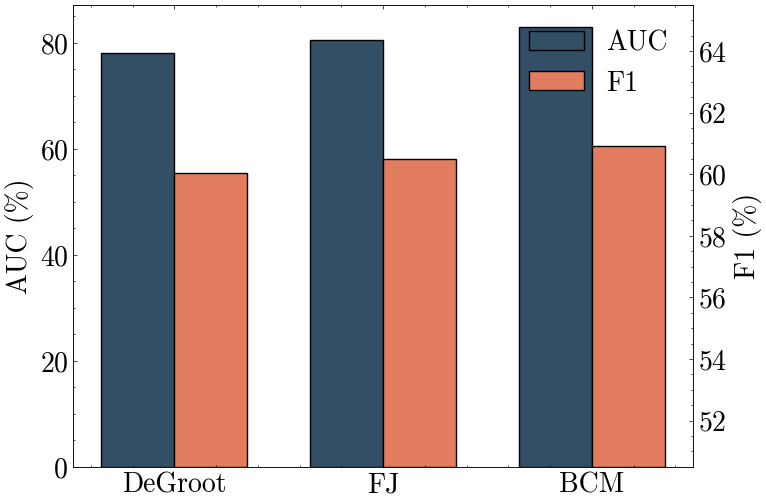

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'no-latex', 'scatter'])
plt.rcParams.update({'font.size': 20})

def plot_auc_f1(x, auc_values, f1_values, x_label, file_name):
    plt.figure(figsize=(8, 6))
    
    # Plot AUC with solid line, filled circle markers, increased marker size, thicker line, and added marker edge
    plt.plot(x, auc_values, '-o', label='AUC', markersize=18, linewidth=2.5,
             markeredgewidth=2, markeredgecolor='black', color='#334f65')
    
    # Plot F1 with dashed line, square markers, increased marker size, thicker line, and added marker edge
    plt.plot(x, f1_values, '--s', label='F1', markersize=18, linewidth=2.5, markeredgewidth=2, markeredgecolor='black', color='#e27d60')
    
    plt.legend()
    
    # Set x-ticks to the specific x values provided
    plt.xticks(ticks=x)
    
    # Add dual y-axis labels
    plt.gca().yaxis.set_label_position("left")
    plt.gca().yaxis.tick_left()
    plt.ylabel('AUC (%)')
    
    ax2 = plt.gca().twinx()  # Create a twin y-axis
    ax2.set_ylabel('F1 (%)')
    
    # Adjust the y-limits of both axes to match scales appropriately
    plt.ylim([np.min(auc_values) - 5, np.max(auc_values) + 5])
    ax2.set_ylim([np.min(f1_values) - 5, np.max(f1_values) + 5])
    
    # Save the plot
    plt.savefig(file_name)
    plt.show()

# Data definition
x_return_prob = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
auc_rwr = np.array([77.5, 78.5, 80.5, 81.0, 80.0])
f1_rwr = np.array([56.0, 57.5, 59.0, 58.5, 57.0])

x_network_size = np.array([10, 25, 50, 75, 100])
auc_ego = np.array([77.0, 78.5, 80.8, 82.0, 81.5])
f1_ego = np.array([55.5, 57.5, 58.2, 59.0, 58.5])

x_layers = np.array([1, 2, 3, 4, 5])
auc_layers = np.array([77.5, 80.0, 83.5, 81.0, 79.0])
f1_layers = np.array([56.5, 58.0, 60.5, 58.2, 57.0])

# Use the function to plot each case without error bars and with specific x-ticks
plot_auc_f1(x_return_prob, auc_rwr, f1_rwr, 'Return Probability', 'Output/RQ3/rwr_return_prob.pdf')
plot_auc_f1(x_network_size, auc_ego, f1_ego, 'Size of Ego Network', 'Output/RQ3/ego_size.pdf')
plot_auc_f1(x_layers, auc_layers, f1_layers, 'Number of Layers', 'Output/RQ3/kan_layers.pdf')

def plot_auc_f1_bar(models, auc_values, f1_values, file_name):
    bar_width = 0.35  # Width of the bars
    x = np.arange(len(models))  # The label locations

    plt.figure(figsize=(8, 6))

    # Plot AUC bars with font size 20
    plt.bar(x - bar_width/2, auc_values, bar_width, edgecolor='black', label='AUC', color='#334f65')
    
    # Plot F1 bars
    plt.bar(x + bar_width/2, f1_values, bar_width, edgecolor='black', label='F1', color='#e27d60')
    plt.legend()
    plt.xticks(ticks=x, labels=models)  # Set x-ticks to the specific model names
    
    # Add dual y-axis labels
    plt.gca().yaxis.set_label_position("left")
    plt.gca().yaxis.tick_left()
    plt.ylabel('AUC (%)')
    
    ax2 = plt.gca().twinx()  # Create a twin y-axis
    ax2.set_ylabel('F1 (%)')
    # Adjust the y-limits of both axes to match scales appropriately
    plt.ylim([np.min(auc_values) - 5, np.max(auc_values) + 5])
    ax2.set_ylim([np.min(f1_values) - 5, np.max(f1_values) + 5])
    
    # Save the plot
    plt.savefig(file_name)
    plt.show()

# Data for Opinion Dynamics Model
models = ['DeGroot', 'FJ', 'BCM']
auc_models = np.array([78.0, 80.5, 83.0])
f1_models = np.array([55.5, 58.0, 60.5])

# Use the function to plot the bar chart
plot_auc_f1_bar(models, auc_models, f1_models, 'Output/RQ3/opinion_dynamics.pdf')



(24428, 50) (24428,) (24428, 50, 50)


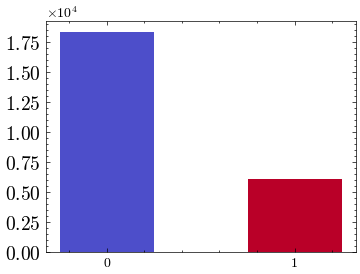

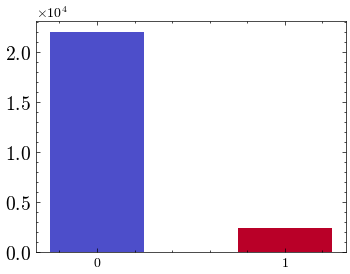

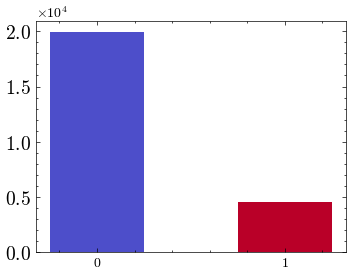

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science', 'no-latex'])

def plot_label_distribution(unique_labels, label_counts, output_file, figsize=(4, 3), colors=['#4d4eca', '#b90028']):
    """
    Plots the label distribution as a bar chart and saves it to a file.
    
    Args:
        unique_labels (array-like): Unique labels (e.g., [0, 1]) representing different categories.
        label_counts (array-like): Counts corresponding to the unique labels.
        output_file (str): Path to save the generated plot.
        figsize (tuple, optional): Size of the figure. Defaults to (4, 3).
        colors (list, optional): Colors to use for the bars. Defaults to ['#4d4eca', '#b90028'].
    """
    plt.figure(figsize=figsize)
    plt.bar(unique_labels, label_counts, width=0.5, color=colors)  # Set bar width and colors
    plt.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    plt.yticks(fontsize=14)  # Adjust Y-axis label font size
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

# Load the uploaded files
vertex_ids = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/vertex_id.npy')
labels = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/label.npy')
adjacency_matrix = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/adjacency_matrix.npy')

# Display the shapes of the loaded data to understand their dimensions
print(vertex_ids.shape, labels.shape, adjacency_matrix.shape)

# Simulated data
unique_labels = ['0', '1']
_, label_counts = np.unique(labels, return_counts=True)
label_counts_deepinf = [22023, 2405]
label_counts_sigkan = [19937, 4491]

# Plot and save the figures using the defined function
plot_label_distribution(unique_labels, label_counts, 'digg_label_distribution.pdf')
plot_label_distribution(unique_labels, label_counts_deepinf, 'digg_label_distribution_deepinf.pdf')
plot_label_distribution(unique_labels, label_counts_sigkan, 'digg_label_distribution_sigkan.pdf')


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx

# 加载数据
vertex_ids = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/vertex_id.npy')
labels = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/label.npy')
adjacency_matrix = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/adjacency_matrix.npy')
vertex_features = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/vertex_feature.npy')

# 为方便展示，取一个用户及其邻居的ego网络作为案例
user_idx = 8832  # 用户ID
ego_network_ids = vertex_ids[user_idx]  # 用户及其邻居的节点ID
ego_adjacency_matrix = adjacency_matrix[user_idx]  # 用户的邻接矩阵

# 根据邻居节点ID提取相应的节点特征 (vertex_features 大小为 (279680, 7))
ego_vertex_features = vertex_features[ego_network_ids]  # 使用 vertex_ids 提取对应节点特征

# 提取该用户的标签 (labels 大小为 (24428,))
ego_labels = labels[user_idx]  # 用户的转发标签

# 转换为torch tensor
adj_matrix = torch.tensor(ego_adjacency_matrix, dtype=torch.float32)
features = torch.tensor(ego_vertex_features, dtype=torch.float32)
labels = torch.tensor(ego_labels, dtype=torch.float32)

# 定义GAT层
class GraphAttentionLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphAttentionLayer, self).__init__()
        self.fc = nn.Linear(in_features, out_features, bias=False)
        self.attn_fc = nn.Linear(2*out_features, 1, bias=False)

    def forward(self, h, adj):
        Wh = self.fc(h)  # 节点特征线性变换
        N = h.size(0)

        # 扩展维度以计算节点对之间的注意力
        Wh_repeat = Wh.unsqueeze(1).repeat(1, N, 1)
        Wh_concat = torch.cat([Wh_repeat, Wh.unsqueeze(0).repeat(N, 1, 1)], dim=-1)

        # 计算自注意力得分
        e = self.attn_fc(Wh_concat).squeeze(-1)

        # 仅在邻接矩阵中有边的节点间保留注意力得分
        zero_vec = -9e15 * torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        attention = F.softmax(attention, dim=1)

        # 更新特征
        h_prime = torch.matmul(attention, Wh)
        return h_prime, attention

# 初始化GAT层
gat_layer = GraphAttentionLayer(in_features=7, out_features=16)  # 节点特征为7维

# 前向传播
with torch.no_grad():
    updated_features, attention_weights = gat_layer(features, adj_matrix)

# 可视化注意力权重
def visualize_attention(adj_matrix, attention_weights, ego_network_ids, user_idx):
    G = nx.from_numpy_array(adj_matrix.numpy())  # 根据邻接矩阵构建网络
    pos = nx.kamada_kawai_layout(G)

    # 计算每个节点的总注意力权重
    node_weights = attention_weights.sum(dim=1).cpu().numpy()
    
    # 标准化节点权重以用于颜色映射
    norm_node_weights = (node_weights - node_weights.min()) / (node_weights.max() - node_weights.min())

    # 设置节点颜色，中心用户节点为红色，其他节点根据注意力权重设置颜色
    node_colors = ['red' if i == 0 else plt.cm.Blues(norm_node_weights[i]) for i in range(len(ego_network_ids))]

    # 可视化节点和边，节点颜色根据注意力权重调整
    plt.figure(figsize=(10, 10))
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    edges = nx.draw_networkx_edges(G, pos, edge_color='gray')
    plt.tight_layout()
    # 保存输出图像
    plt.savefig(f'Output/RQ4/att_{user_idx}.pdf')
    plt.show()

# 运行可视化
visualize_attention(adj_matrix, attention_weights, ego_network_ids, user_idx)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 加载数据
vertex_ids = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/vertex_id.npy')
labels = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/label.npy')
adjacency_matrix = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/adjacency_matrix.npy')
vertex_features = np.load('/data/hwxu/Dataset/NPU/InflunceLocality/digg/vertex_feature.npy')

# 为方便展示，取一个用户及其邻居的ego网络作为案例
user_idx = 385  # 用户ID
ego_network_ids = vertex_ids[user_idx]  # 用户及其邻居的节点ID
ego_adjacency_matrix = adjacency_matrix[user_idx]  # 用户的邻接矩阵
# 根据邻居节点ID提取相应的节点特征 (vertex_features 大小为 (279680, 7))
ego_vertex_features = vertex_features[ego_network_ids]  # 使用 vertex_ids 提取对应节点特征
# 提取该用户的标签 (labels 大小为 (24428,))
ego_labels = labels[user_idx]  # 用户的转发标签


# 初始意见状态 (使用节点特征的某个维度作为初始意见)
initial_opinions = np.random.rand(len(ego_network_ids))  # 随机初始化意见状态

# Bounded Confidence Model (BCM) 更新函数
def bcm_update(opinions, adjacency_matrix, delta=0.3, steps=10, epsilon_1=0.1, epsilon_2=0.5, mu=1.5, nu=-1):
    """
    opinions: 当前节点的意见值 (初始特征)
    adjacency_matrix: 邻接矩阵表示节点之间的连通性
    delta: Bounded Confidence Interval (意见动态模型中的置信区间)
    steps: 更新的迭代次数
    epsilon_1, epsilon_2: BCM模型中的置信区间参数，用于控制节点相似度影响
    mu: 放大相似节点之间的影响
    nu: 对敌对节点(差异较大)施加负面影响
    """
    n = len(opinions)
    updated_opinions = opinions.copy()

    # 计算相似度函数 s_uv
    def calculate_similarity(i, j, opinions):
        return np.abs(opinions[i] - opinions[j])

    # 权重函数 ψ(s_uv)
    def influence_function(similarity, epsilon_1, epsilon_2, mu, nu):
        if similarity > epsilon_2:
            return mu * similarity
        elif epsilon_1 <= similarity <= epsilon_2:
            return similarity
        else:
            return nu * (1 - similarity)

    for _ in range(steps):
        new_opinions = updated_opinions.copy()
        for i in range(n):
            neighbors = np.where(adjacency_matrix[i] > 0)[0]
            influences = 0
            total_weight = 0

            for j in neighbors:
                similarity = calculate_similarity(i, j, updated_opinions)
                if similarity <= delta:  # 满足有界置信区间
                    weight = influence_function(similarity, epsilon_1, epsilon_2, mu, nu)
                    influences += weight * (updated_opinions[j] - updated_opinions[i])
                    total_weight += weight

            if total_weight > 0:
                new_opinions[i] += influences / total_weight

        updated_opinions = new_opinions

    return updated_opinions

# 使用BCM更新节点的意见状态
updated_opinions = bcm_update(initial_opinions, ego_adjacency_matrix)

# 可视化 r-ego 网络和意见动态的结果
def plot_ego_network(adjacency_matrix, opinions, updated_opinions):
    """
    可视化展示 r-ego 网络，展示更新前后的意见变化
    """
    G = nx.Graph()

    # 创建网络
    num_nodes = adjacency_matrix.shape[0]
    for i in range(num_nodes):
        G.add_node(i, opinion=opinions[i], updated_opinion=updated_opinions[i])

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adjacency_matrix[i, j] > 0:
                G.add_edge(i, j)

    # 绘制网络图，使用颜色表示节点意见状态的更新
    pos = nx.kamada_kawai_layout(G)
    node_colors = [G.nodes[i]['updated_opinion'] for i in G.nodes()]
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Reds, node_size=500)
    nx.draw_networkx_edges(G, pos)
    plt.savefig(f'Output/RQ4/bcm_{user_idx}.pdf')
    plt.show()

# 绘制用户的r-ego网络以及意见更新前后的变化
plot_ego_network(ego_adjacency_matrix, initial_opinions, updated_opinions)
